In [1]:
from utils import io
from globals import *
from dataframes.subject import Subject
from dataframes.curriculum import Curriculum
from ga.genetic_algorithm import ProblemContext, GeneticAlgorithm
from nsga.nsga import NSGA2

In [2]:
subjects = Subject("csv/subjects.csv")
curriculum = Curriculum("csv/curriculum.csv", subjects.df)

context = ProblemContext(
    curriculum=curriculum,
    time_slot_indices=list(range(15)),
    room_indices=list(range(16))
)

# ga = GeneticAlgorithm(
#     context=context,
#     population_size=100,
#     max_generation=100
# )

seed = io.import_all_txt_arrays("seed")

nsga = NSGA2(
    context=context,
    population_size=200,
    max_generation=100,
    seed=seed
)

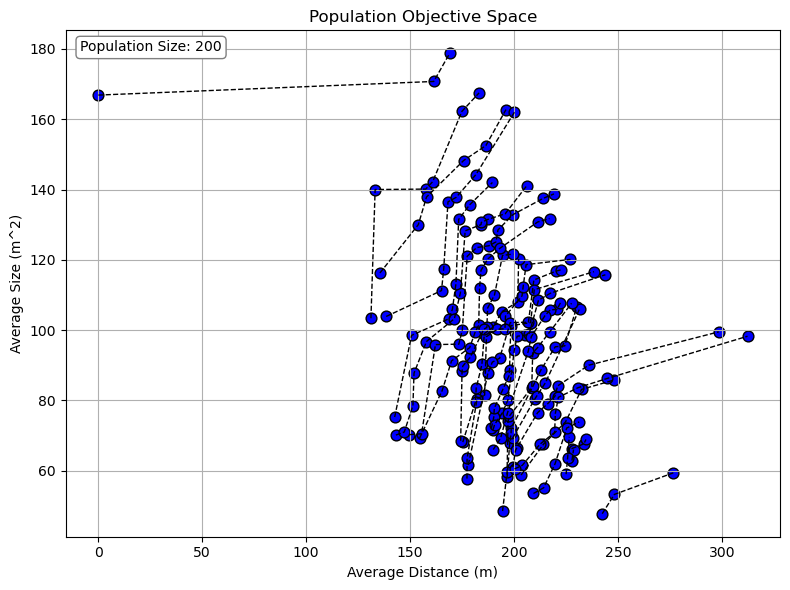

In [3]:
nsga.plot_objective_space(connect_by_rank=True)

In [4]:
nsga.run()

In [ ]:
nsga.plot_objective_space(connect_by_rank=True)

In [ ]:
nsga.plot_evaluation("average_distance")

In [ ]:
nsga.plot_evaluation("average_size")

In [ ]:
nsga.assign_crowding_distance()
for front in nsga.fronts:
    for genome in front:
        print(genome.crowding_distance)
    print()

In [ ]:
pp = [g for g in nsga.population if g.calculate_average_distance() != 0]
nsga.plot_objective_space(population = pp, connect_by_rank=True)